In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import operator

In [168]:
'''1a extract 25 evenly spaced bin locations from a list of unknown length'''
def extract_bins(df, id): #take input of the datframe and the user id
    li = [] #empty list to be added to
    constant = math.floor(len(df[df['Id'] == id]) / 25) #find a consistent value to be added and round down (would rather exclude values at the end than take too many)
    val = 0
    for i in range(26): #run it 26 times to create 25 'bins'
        li.append(val) #add the value to the list and inciment value to be added next time
        val += constant
    return li

In [169]:
'''1a find the mean of each bin and add to a list'''
def find_means(df, id, bins): #take input of dataframe, user id, and the list of bins
    means = []
    for i in range(25): #cycle thru all 25 bins
        val = df['Value'][df['Id'] == id][bins[i]:bins[i+1]].mean() #isolate the heart rate (Value) at the desired user ID within the desired bin range, and take the mean
        means.append(val) #add the mean to the list of means
    return means

In [170]:
'''1a import dataset'''
heartrate_seconds_merged = pd.read_csv('/Users/stevenlacroix/Desktop/semester 3/cs 242/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv')

In [171]:
'''1a cycle thru all desired ID's to extract a list of means for each'''
ids = heartrate_seconds_merged['Id'].unique()[0:5] #get list of desired ID's
all_means = [] #soon to be 2D list: list of list of means
for id in ids: #iterate thru desired ID's
    bins = extract_bins(heartrate_seconds_merged, id) #extract the bins
    mean_list = find_means(heartrate_seconds_merged, id, bins) #get the means using the extracted bins
    all_means.append(mean_list) #add list to bigger list

/var/folders/30/v5nbzh59537b3bqk04mty8jm0000gn/T/ipykernel_14686/2962554939.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  val = df['Value'][df['Id'] == id][bins[i]:bins[i+1]].mean() #isolate the heart rate (Value) at the desired user ID within the desired bin range, and take the mean


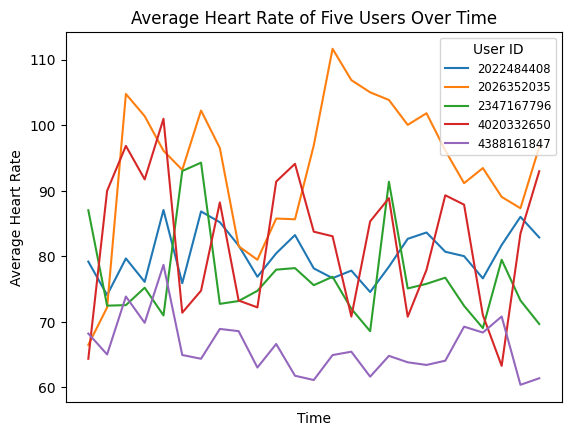

In [172]:
'''1a plot our findings using a line plot, add axis labels and a legend for ease of consumption'''
labels = ids #get list of labels for legend
fig, ax = plt.subplots()
for mean, label in zip(all_means, labels): #iterate thru each list of means & label
    ax.plot(mean, label=label) #plot the mean and add label
    
legend = plt.legend(fontsize='small') #create the legend, and make it small
legend.set_title('User ID') #add title to the legend
plt.xticks([]) #remove xticks (they didn't represent time, just bin indices - not necessary)
plt.xlabel('Time')
plt.ylabel('Average Heart Rate')
plt.title('Average Heart Rate of Five Users Over Time')
plt.show()

In [173]:
'''1b read in dataframe'''
sleepDay_merged = pd.read_csv('/Users/stevenlacroix/Desktop/semester 3/cs 242/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')

In [336]:
'''1b find list of unique user id's and find the average number of minutes slept for each'''
id_values = list(sleepDay_merged['Id'].unique()) #list of unique user id's
mean_values = {}
for id in id_values: #iterate thru each user id
    val = sleepDay_merged['TotalMinutesAsleep'][sleepDay_merged['Id'] == id].mean() #find all rows of that user and find the mean of the minutes slept
    mean_values[id] = val #add value to a list
id_strings = list(map(str, id_values)) #convert user id list to strings (for plotting)
mean_values_sorted = dict(sorted(mean_values.items(), key=operator.itemgetter(1), reverse=True))

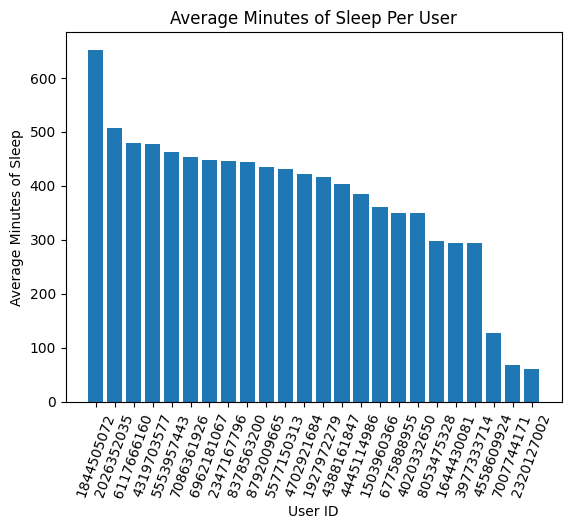

In [347]:
'''1b plot findings using a bar plot'''
ids = list(mean_values_sorted.keys())
ids = list(map(str, ids))
bars = list(mean_values_sorted.values())

fig, ax = plt.subplots() #create plot
ax.bar(x=ids, height=bars) #plot bars for each user id and the corresponding average minutes slept
plt.title('Average Minutes of Sleep Per User')
plt.xticks(rotation=70) #spin x labels
plt.xlabel('User ID')
plt.ylabel('Average Minutes of Sleep')
plt.show()

In [176]:
'''1c read in dataframe'''
dailySteps_merged = pd.read_csv('/Users/stevenlacroix/Desktop/semester 3/cs 242/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv')

In [350]:
'''1c find list of unique user id's and find the average number of steps taken for each'''
id_values = list(dailySteps_merged['Id'].unique()) #list of unique user id's
mean_values = {}
for id in id_values: #iterate thru each user id
    val = dailySteps_merged['StepTotal'][dailySteps_merged['Id'] == id].mean() #find all rows of that user and find the mean of the minutes slept
    mean_values[id] = val #add value to a list
id_strings = list(map(str, id_values)) #convert user id list to strings (for plotting)
mean_values_sorted = dict(sorted(mean_values.items(), key=operator.itemgetter(1), reverse=True))

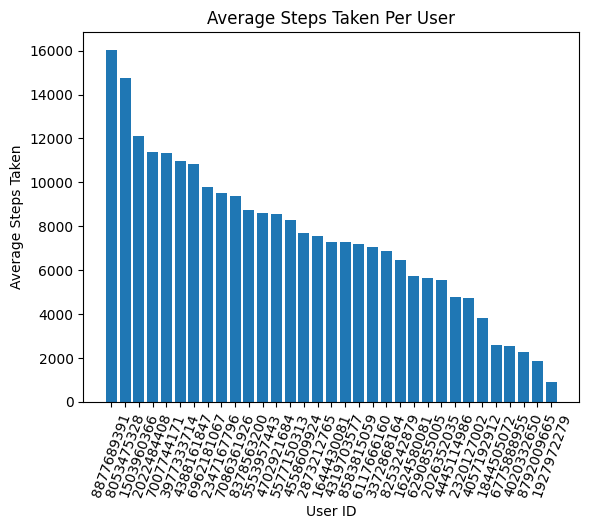

In [355]:
'''1c plot findings using a bar plot'''
ids = list(mean_values_sorted.keys())
ids = list(map(str, ids))
bars = list(mean_values_sorted.values())

fig, ax = plt.subplots() #create plot
ax.bar(x=ids, height=bars) #plot bars for each user id and the corresponding average minutes slept
plt.title('Average Steps Taken Per User')
plt.xticks(rotation=70) #spin x labels
plt.xlabel('User ID')
plt.ylabel('Average Steps Taken')
plt.show()

In [179]:
'''1d read in dataframe'''
weightLogInfo_merged = pd.read_csv('/Users/stevenlacroix/Desktop/semester 3/cs 242/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')

In [180]:
'''1d isolate the user we need and add required data'''
user_id = weightLogInfo_merged['Id'].value_counts().index[0] #find valuecounts for id column and isolate the one at the top
data = weightLogInfo_merged[weightLogInfo_merged['Id'] == user_id] #isolate just the data with the user id we found above
data['newDate'] = data['Date'].str.split().str[0] #create a new column that just has the date (not the time, for plotting)

/var/folders/30/v5nbzh59537b3bqk04mty8jm0000gn/T/ipykernel_14686/418049766.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['newDate'] = data['Date'].str.split().str[0] #create a new column that just has the date (not the time, for plotting)


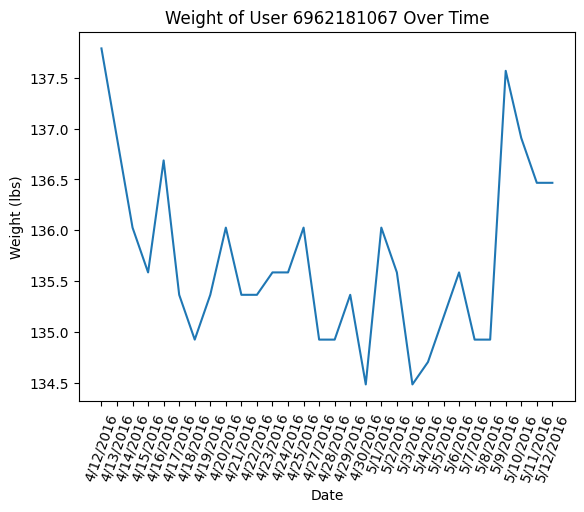

In [181]:
'''1d plot our findings'''
fig, ax = plt.subplots() #create new plot
ax.plot(data['newDate'], data['WeightPounds']) #plot with new date (created above) on x and weight on y
plt.xlabel('Date')
plt.xticks(rotation=70) #spin x labels
plt.ylabel('Weight (lbs)')
plt.title('Weight of User 6962181067 Over Time')
plt.show()

In [182]:
'''2.1 (1) merge steps, intesities, and calories into 1 df - hourly'''
hourlySteps_merged = pd.read_csv('/Users/stevenlacroix/Desktop/semester 3/cs 242/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')
hourlyIntensities_merged = pd.read_csv('/Users/stevenlacroix/Desktop/semester 3/cs 242/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')
hourlyCalories_merged = pd.read_csv('/Users/stevenlacroix/Desktop/semester 3/cs 242/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')

temp_hourly_df = pd.merge(hourlySteps_merged, hourlyIntensities_merged, how='inner', on=['Id', 'ActivityHour']) #inner merge, keeping id and timestamps together
hourly_df = pd.merge(temp_hourly_df, hourlyCalories_merged, how='inner', on=['Id', 'ActivityHour']) #putting 3rd df into the first 2
hourly_df.head()

,Id,ActivityHour,StepTotal,TotalIntensity,AverageIntensity,Calories
0,1503960366,4/12/2016 12:00:00 AM,373,20,0.333333,81
1,1503960366,4/12/2016 1:00:00 AM,160,8,0.133333,61
2,1503960366,4/12/2016 2:00:00 AM,151,7,0.116667,59
3,1503960366,4/12/2016 3:00:00 AM,0,0,0.000000,47
4,1503960366,4/12/2016 4:00:00 AM,0,0,0.000000,48


In [183]:
'''2.1 (2) merge calories, intensities, and METs into 1 df - minutely'''
minuteCaloriesNarrow_merged = pd.read_csv('/Users/stevenlacroix/Desktop/semester 3/cs 242/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv')
minuteIntensitiesNarrow_merged = pd.read_csv('/Users/stevenlacroix/Desktop/semester 3/cs 242/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv')
minuteMETsNarrow_merged = pd.read_csv('/Users/stevenlacroix/Desktop/semester 3/cs 242/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv')

temp_minutely_df = pd.merge(minuteCaloriesNarrow_merged, minuteIntensitiesNarrow_merged, how='inner', on=['Id', 'ActivityMinute']) #inner merge, keeping id and timestamps together
minutely_df = pd.merge(temp_minutely_df, minuteMETsNarrow_merged, how='inner', on=['Id', 'ActivityMinute']) #putting 3rd df into the first 2
minutely_df.head()

,Id,ActivityMinute,Calories,Intensity,METs
0,1503960366,4/12/2016 12:00:00 AM,0.7865,0,10
1,1503960366,4/12/2016 12:01:00 AM,0.7865,0,10
2,1503960366,4/12/2016 12:02:00 AM,0.7865,0,10
3,1503960366,4/12/2016 12:03:00 AM,0.7865,0,10
4,1503960366,4/12/2016 12:04:00 AM,0.7865,0,10


In [357]:
'''2.2 convert date columns in a number of dataframes to datetime in a new column'''
dailyActivity_merged = pd.read_csv('/Users/stevenlacroix/Desktop/semester 3/cs 242/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
dailyActivity_merged['Date'] = pd.to_datetime(dailyActivity_merged['ActivityDate'])

sleepDay_merged['Date'] = pd.to_datetime(sleepDay_merged['SleepDay'])

hourly_df['Date'] = pd.to_datetime(hourly_df['ActivityHour'])

minutely_df['Date'] = pd.to_datetime(minutely_df['ActivityMinute'])
minutely_df.head()

,Id,ActivityMinute,Calories,Intensity,METs,Date
0,1503960366,4/12/2016 12:00:00 AM,0.7865,0,10,2016-04-12 00:00:00
1,1503960366,4/12/2016 12:01:00 AM,0.7865,0,10,2016-04-12 00:01:00
2,1503960366,4/12/2016 12:02:00 AM,0.7865,0,10,2016-04-12 00:02:00
3,1503960366,4/12/2016 12:03:00 AM,0.7865,0,10,2016-04-12 00:03:00
4,1503960366,4/12/2016 12:04:00 AM,0.7865,0,10,2016-04-12 00:04:00


In [185]:
'''2.3 find average heart rate per minute using the heartrate_seconds_merged data'''
heartrate_seconds_merged['Time'] = pd.to_datetime(heartrate_seconds_merged['Time']) #convert time column to datetime objects
minuteAvgHeartRate = heartrate_seconds_merged.groupby('Id').resample('T', on='Time').mean() #group by Id, sample each minute, then take the mean of the sample
minuteAvgHeartRate = minuteAvgHeartRate.drop('Id', axis=1).reset_index() #drop the extra Id column that was created and reset index to get dataframe back to familiar format
minuteAvgHeartRate.columns = ['Id', 'Time', 'Mean'] #rename columns
print(minuteAvgHeartRate.head())

           Id                Time        Mean
0  2022484408 2016-04-12 07:21:00  101.600000
1  2022484408 2016-04-12 07:22:00   87.888889
2  2022484408 2016-04-12 07:23:00   58.000000
3  2022484408 2016-04-12 07:24:00   58.000000
4  2022484408 2016-04-12 07:25:00   56.777778


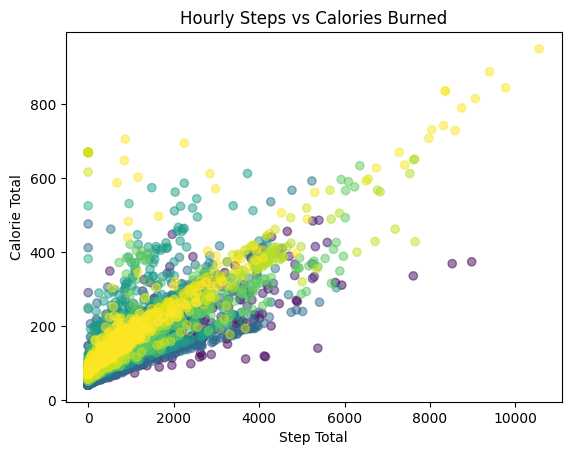

In [186]:
'''3.1a plot relating steps and calories from the hourly dataset'''
fig, ax = plt.subplots()
ax.scatter(hourly_df['StepTotal'], hourly_df['Calories'], c=hourly_df['Id'], alpha=0.5) #scatter plot: steps on x, calories on y, color based on id
plt.title('Hourly Steps vs Calories Burned')
plt.xlabel('Step Total')
plt.ylabel('Calorie Total')
plt.show()

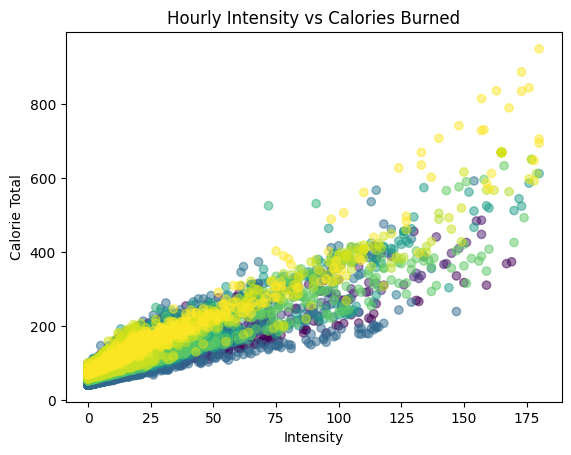

In [187]:
'''3.1b plot relating intesity and calories from the hourly dataset'''
fig, ax = plt.subplots()
ax.scatter(hourly_df['TotalIntensity'], hourly_df['Calories'], c=hourly_df['Id'], alpha=0.5) #scatter plot: intensity on x, calories on y, color based on id
plt.title('Hourly Intensity vs Calories Burned')
plt.xlabel('Intensity')
plt.ylabel('Calorie Total')
plt.show()

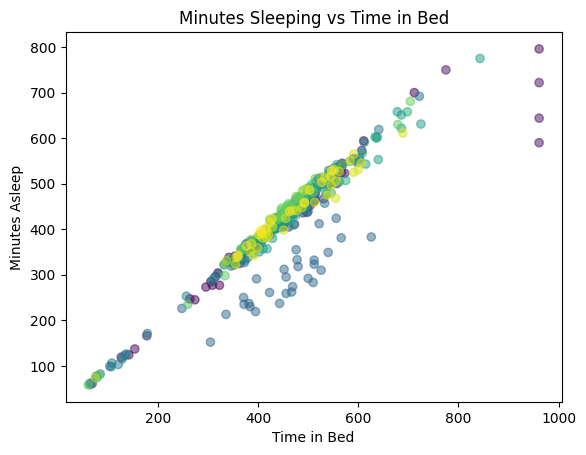

In [188]:
'''3.2 scatter plot to find correlation between minutes asleep and time in bed'''
fig, ax = plt.subplots()
ax.scatter(sleepDay_merged['TotalTimeInBed'], sleepDay_merged['TotalMinutesAsleep'], c=sleepDay_merged['Id'], alpha=0.5) #scatter plot: time in bed on x, time asleep on y, color based on id
plt.title('Minutes Sleeping vs Time in Bed')
plt.xlabel('Time in Bed')
plt.ylabel('Minutes Asleep')
plt.show()

/var/folders/30/v5nbzh59537b3bqk04mty8jm0000gn/T/ipykernel_14686/2986807131.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(times, rotation=70, fontsize=6)  #spin x labels
/var/folders/30/v5nbzh59537b3bqk04mty8jm0000gn/T/ipykernel_14686/2986807131.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(times, rotation=70, fontsize=6)  #spin x labels


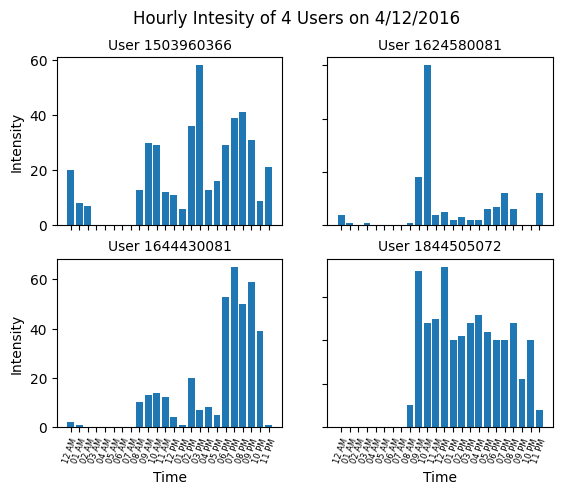

In [249]:
'''3.3 plot bar graphs to show distribution of intensity over a day, find difference between users'''
ids = hourly_df['Id'].unique()[0:4] #find first 4 unique id's
temp_data = hourly_df[hourly_df['Date'].dt.strftime('%Y-%m-%d')=='2016-04-12'] #find data where the date column is equal to '2016-04-12'
data1 = temp_data[temp_data['Id'] == ids[0]] #find data for that date and the first id
data2 = temp_data[temp_data['Id'] == ids[1]] #find data for that date and the second id
data3 = temp_data[temp_data['Id'] == ids[2]] #find data for that date and the third id
data4 = temp_data[temp_data['Id'] == ids[3]] #find data for that date and the fourth id
times = data1['Date'].dt.strftime('%I %p') #get a list of the hours and whether it's am or pm (for graphing)

fig, ax = plt.subplots(2,2) #2 by 2 group of plots
fig.suptitle('Hourly Intesity of 4 Users on 4/12/2016') #set overall plot title

ax[0,0].bar(times, data1['TotalIntensity']) #bar graph of times on the x and intensity on the y
ax[0,0].set_title('User ' + str(ids[0]), fontsize=10) #set plot title to the user id, decrease text size

ax[0,1].bar(times, data2['TotalIntensity']) #bar graph of times on the x and intensity on the y
ax[0,1].set_title('User ' + str(ids[1]), fontsize=10) #set plot title to the user id, decrease text size

ax[1,0].bar(times, data3['TotalIntensity']) #bar graph of times on the x and intensity on the y
ax[1,0].set_title('User ' + str(ids[2]), fontsize=10) #set plot title to the user id, decrease text size
ax[1,0].set_xticklabels(times, rotation=70, fontsize=6)  #spin x labels

ax[1,1].bar(times, data4['TotalIntensity']) #bar graph of times on the x and intensity on the y
ax[1,1].set_title('User ' + str(ids[3]), fontsize=10) #set plot title to the user id, decrease text size
ax[1,1].set_xticklabels(times, rotation=70, fontsize=6)  #spin x labels

for ax in ax.flat:
    ax.set(xlabel='Time', ylabel='Intensity') #set x and y labels on the outside edges of the plot only
    ax.label_outer() #remove x and y tick labels from the inner plots

plt.show()

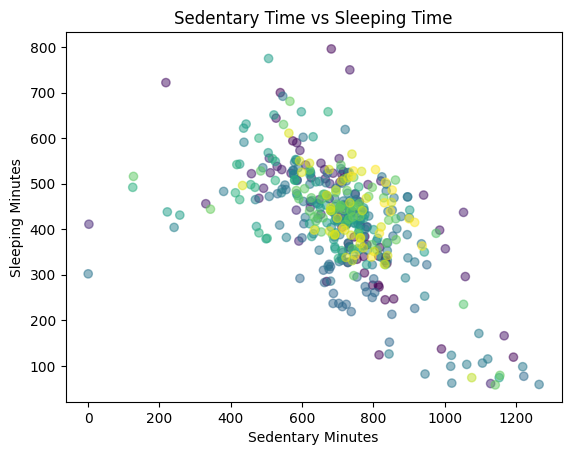

In [278]:
'''3.4 show relationship between sedentary minutes and sleeping minutes'''
merged_df = sleepDay_merged.merge(dailyActivity_merged, on=['Id', 'Date'], how='inner') #do an inner merge of the dataframes on the user id's and date

fig, ax = plt.subplots()
ax.scatter(merged_df['SedentaryMinutes'], merged_df['TotalMinutesAsleep'], c=merged_df['Id'], alpha=0.5) #scatter plot: sedentary minutes on x, time asleep on y, color based on id
plt.title('Sedentary Time vs Sleeping Time')
plt.xlabel('Sedentary Minutes')
plt.ylabel('Sleeping Minutes')
plt.show()


In [318]:
'''4.1 most significant difference for calories. 
A 2 sample t test seeing if there's a difference in mean calories burned between people with less than or more than 20 very actives minutes'''
more_active = dailyActivity_merged[dailyActivity_merged['VeryActiveMinutes'] > 20]['Calories'] #list of calorie values for those with more than 20 very active minutes
less_active = dailyActivity_merged[dailyActivity_merged['VeryActiveMinutes'] < 20]['Calories'] #list of calorie values for those with less than 20 very active minutes
t, p = stats.ttest_ind(more_active, less_active) #2 sample t test
if p < 0.05: #significance level of 0.05
    print('reject null')
    print(p)
else:
    print('fail to reject null')
    print(p)
#null: there is no significant difference between the average number of calories burned between people with less than 20 active minutes versus more than 20 active minutes
#alternative: there is a difference


reject null
9.205600707046131e-44


In [328]:
'''4.1 least significant difference for calories. 
A 2 sample t test seeing if there's a difference in mean calories burned between people with less than or more than 990 sedentary minutes'''
more_sedentary = dailyActivity_merged[dailyActivity_merged['SedentaryMinutes'] > 990]['Calories'] #list of calorie values for those with more than 990 very sedentary minutes
less_sedentary = dailyActivity_merged[dailyActivity_merged['SedentaryMinutes'] < 990]['Calories'] #list of calorie values for those with less than 990 very sedentary minutes
t, p = stats.ttest_ind(more_sedentary, less_sedentary) #2 sample t test
if p < 0.05: #significance level of 0.05
    print('reject null')
    print(p)
else:
    print('fail to reject null')
    print(p)
#null: there is no significant difference between the average number of calories burned between people with less than 990 sedentary minutes versus more than 990 sedentary minutes
#alternative: there is a significant difference

fail to reject null
0.06938386109311698
